# URBAN AIR POLLUTION ANALYSIS USING SENSOR DATA

# Comparing areas are VELACHERY and Coimbatore with 5 MAIN POLLUTANTS

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [304]:
#loading dataset
data1= pd.read_csv('velachery.csv', header=None)

In [305]:
#loading dataset
data2= pd.read_csv('SIDCO Kurichi, Coimbatore - TNPCB.csv', header=None)

In [306]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Date,PM25,NO,NO2,NOx,SO2,CO,Ozone,RH,Temp,WD,SR
1,01-04-2020 00:00,32.21,8.27,1.17,8.19,8.73,0.73,16.57,67.52,NaN,154.94,283.76
2,02-04-2020 00:00,20.08,7.6,1.64,8.22,8.04,0.74,18.42,68.8,NaN,174.52,259.23
3,03-04-2020 00:00,12.82,7.58,1.83,8.43,7.37,0.73,16.27,67.83,NaN,159.07,250.1
4,04-04-2020 00:00,11.23,8.32,1.64,8.65,5.79,0.76,13.19,65.33,NaN,145.94,282.04


In [307]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WD,SR,RH,AT
1,01-04-2020 00:00,34.87,32.87,0.57,55.74,56.3,NaN,8.7,0.62,49.71,243.4,283.59,49.15,30.12
2,02-04-2020 00:00,34.53,34.86,0.74,67.15,67.88,NaN,6.62,0.6,44.12,200.11,274.69,52.23,30.57
3,03-04-2020 00:00,34.54,33.09,0.75,66.37,67.13,NaN,6.27,0.56,42.31,180.07,271.96,58.17,30.19
4,04-04-2020 00:00,24.82,25.99,0.77,66.75,67.52,NaN,6.12,0.56,42.06,203.44,279.72,54.31,30.49


In [308]:
#defining headers(Capitalized)
col=['DATE','PM25','NO','NO2','NOx','SO2',
     'CO','Ozone','RH','Temp','WD','SR']
col1=['DATE','PM25','PM10','NO','NO2','NOx','NH3','SO2',
     'CO','Ozone','WD','SR','RH','AT']

In [309]:
#Defining col numbers
r=list(np.arange(len(col)))
r1=list(np.arange(len(col1)))

In [310]:
df1=pd.read_csv('velachery.csv')
df1.head(3)

,Date,PM25,NO,NO2,NOx,SO2,CO,Ozone,RH,Temp,WD,SR
0,01-04-2020 00:00,32.21,8.27,1.17,8.19,8.73,0.73,16.57,67.52,NaN,154.94,283.76
1,02-04-2020 00:00,20.08,7.60,1.64,8.22,8.04,0.74,18.42,68.80,NaN,174.52,259.23
2,03-04-2020 00:00,12.82,7.58,1.83,8.43,7.37,0.73,16.27,67.83,NaN,159.07,250.10


In [311]:
df2=pd.read_csv('SIDCO Kurichi, Coimbatore - TNPCB.csv',header=None,skiprows=1,names=col1,na_filter=True,
                   na_values=-100,usecols=r1)
df2.head(3)

,DATE,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WD,SR,RH,AT
0,01-04-2020 00:00,34.87,32.87,0.57,55.74,56.30,NaN,8.70,0.62,49.71,243.40,283.59,49.15,30.12
1,02-04-2020 00:00,34.53,34.86,0.74,67.15,67.88,NaN,6.62,0.60,44.12,200.11,274.69,52.23,30.57
2,03-04-2020 00:00,34.54,33.09,0.75,66.37,67.13,NaN,6.27,0.56,42.31,180.07,271.96,58.17,30.19


In [312]:
df1.dtypes

Date      object
PM25     float64
NO       float64
NO2      float64
NOx      float64
SO2      float64
CO       float64
Ozone    float64
RH       float64
Temp     float64
WD       float64
SR       float64
dtype: object

In [313]:
df2.dtypes

DATE      object
PM25     float64
PM10     float64
NO       float64
NO2      float64
NOx      float64
NH3      float64
SO2      float64
CO       float64
Ozone    float64
WD       float64
SR       float64
RH       float64
AT       float64
dtype: object

# Replacing  NaN Values with predicted values and mean values

In [314]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 Date       0
PM25       0
NO         0
NO2        1
NOx        0
SO2       13
CO         0
Ozone      0
RH         0
Temp     366
WD         0
SR         1
dtype: int64




# Predicting SO2 values

In [315]:
from sklearn.svm import SVR

In [316]:
#print the correlation matrix
print(df1.corr())

           PM25        NO       NO2       NOx       SO2        CO     Ozone  \
PM25   1.000000 -0.351105  0.348090  0.170413  0.329221 -0.323413 -0.130815   
NO    -0.351105  1.000000 -0.269254  0.261681 -0.053218  0.483397  0.066409   
NO2    0.348090 -0.269254  1.000000  0.857100  0.354533 -0.344082 -0.148714   
NOx    0.170413  0.261681  0.857100  1.000000  0.321957 -0.096681 -0.127823   
SO2    0.329221 -0.053218  0.354533  0.321957  1.000000 -0.127375 -0.182379   
CO    -0.323413  0.483397 -0.344082 -0.096681 -0.127375  1.000000  0.266907   
Ozone -0.130815  0.066409 -0.148714 -0.127823 -0.182379  0.266907  1.000000   
RH     0.166045 -0.125544  0.306932  0.243073  0.137725 -0.203975 -0.262127   
Temp        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WD    -0.264683  0.249754 -0.341592 -0.216091 -0.484084  0.381519  0.208850   
SR    -0.374913  0.411957 -0.498042 -0.266676 -0.114234  0.419362  0.150655   

             RH  Temp        WD        SR  
PM25   

In [317]:
#Split training and prediction dataset
cols = ["PM25","NO2","CO","Ozone","SO2"]
df = df1[cols]
test_df = df[df["SO2"].isnull()]
df = df.dropna()

In [318]:
y_train = df["SO2"]
X_train = df.drop("SO2", axis=1)
X_test = test_df.drop("SO2", axis=1)

In [319]:
sv = SVR()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [320]:
#replace the missing values with predicted values
df1.loc[df1.SO2.isnull(),'SO2'] = y_pred

In [321]:
y_pred

array([ 4.63770075,  6.50024046,  6.84957126,  8.44105026,  7.2082898 ,
       12.63129186, 13.92739718, 10.08637793, 10.67645173, 15.49028639,
       13.14409379, 13.10005078,  6.64477781])

In [322]:
df1['Temp']=df1['Temp'].replace(np.nan,0)

In [323]:
df1['SR']=df1['SR'].replace(np.nan,0)

In [324]:
df1['NO2']=df1['NO2'].replace(np.nan,0)

In [325]:
df2.mean()

PM25      28.527939
PM10      36.359399
NO         0.821360
NO2       26.849970
NOx       25.316108
NH3        6.033107
SO2        9.321826
CO         0.628323
Ozone     14.289251
WD       154.507275
SR       210.487126
RH        74.000210
AT        26.193283
dtype: float64

In [326]:
df2.fillna(df2.mean(),inplace= True)

In [327]:
df2.tail(130)

,DATE,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WD,SR,RH,AT
236,23-11-2020 00:00,45.840000,50.530000,0.82136,23.90000,23.000000,1.040000,15.770000,0.820000,23.620000,171.270000,232.510000,59.22000,25.210000
237,24-11-2020 00:00,51.220000,57.180000,0.82136,24.50000,23.640000,2.610000,16.040000,0.820000,16.690000,183.870000,169.000000,68.87000,26.140000
238,25-11-2020 00:00,49.860000,52.020000,0.82136,21.09000,20.240000,3.530000,15.450000,0.790000,17.540000,184.070000,155.040000,74.23000,26.330000
239,26-11-2020 00:00,29.200000,34.090000,0.82136,16.84000,15.950000,3.900000,14.130000,0.630000,18.270000,143.790000,181.570000,80.59000,26.280000
240,27-11-2020 00:00,29.010000,32.450000,0.82136,18.96000,18.090000,3.650000,13.060000,0.660000,12.200000,190.480000,201.820000,76.79000,26.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,28-03-2021 00:00,28.527939,36.359399,0.82136,26.84997,25.316108,6.033107,9.321826,0.628323,14.289251,154.507275,210.487126,74.00021,26.193283
362,29-03-2021 00:00,28.527939,36.359399,0.82136,26.84997,25.316108,6.033107,9.321826,0.628323,14.289251,154.507275,210.487126,74.00021,26.193283
363,30-03-2021 00:00,28.527939,36.359399,0.82136,26.84997,25.316108,6.033107,9.321826,0.628323,14.289251,154.507275,210.487126,74.00021,26.193283
364,31-03-2021 00:00,28.527939,36.359399,0.82136,26.84997,25.316108,6.033107,9.321826,0.628323,14.289251,154.507275,210.487126,74.00021,26.193283


In [328]:
df1.describe()

,PM25,NO,NO2,NOx,SO2,CO,Ozone,RH,Temp,WD,SR
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000
mean,25.733169,4.943306,7.167951,11.518962,9.938600,0.667869,25.993661,73.610437,0.0,159.355956,139.028497
std,14.788371,2.736721,4.815048,5.118922,7.866677,0.210030,15.307176,7.984963,0.0,53.822402,85.683727
min,3.110000,0.010000,0.000000,0.000000,1.120000,0.330000,3.490000,47.310000,0.0,23.850000,0.000000
25%,15.447500,2.880000,3.627500,8.560000,4.317500,0.510000,15.515000,68.392500,0.0,125.820000,67.062500
50%,25.980000,4.460000,6.335000,10.130000,6.975000,0.580000,22.930000,73.075000,0.0,169.055000,122.185000
75%,31.515000,7.672500,10.220000,14.655000,12.857500,0.780000,32.782500,77.762500,0.0,200.160000,211.150000
max,124.130000,13.770000,22.560000,35.200000,37.180000,1.310000,105.960000,95.770000,0.0,295.280000,381.260000


In [329]:
df2.describe()

,PM25,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,WD,SR,RH,AT
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,28.527939,36.359399,0.821360,26.849970,25.316108,6.033107,9.321826,0.628323,14.289251,154.507275,210.487126,74.000210,26.193283
std,14.690539,15.749880,2.394362,15.919327,14.834148,3.442085,4.786549,0.247707,7.695592,70.334451,47.019151,14.100469,1.859873
min,2.820000,4.850000,0.030000,3.820000,0.000000,0.020000,0.840000,0.000000,1.920000,61.340000,62.850000,6.170000,21.520000
25%,17.915000,25.250000,0.732500,15.590000,15.867500,3.562500,6.150000,0.490000,8.287500,88.085000,184.097500,69.887500,24.940000
50%,25.940000,34.880000,0.821360,22.705000,23.000000,6.033107,6.755000,0.628323,13.590000,154.507275,210.783563,76.705000,26.060000
75%,34.250000,44.360000,0.821360,35.162500,28.570000,8.565000,14.267500,0.760000,18.827500,224.052500,244.712500,82.537500,26.862500
max,100.210000,112.170000,46.220000,78.180000,79.240000,18.700000,23.220000,1.530000,49.710000,281.930000,349.000000,93.340000,32.120000


In [330]:
df1.shape
#Equal Dimensions

(366, 12)

In [331]:
df2.shape
#Equal Dimensions

(366, 14)

# Check for Missing values

In [332]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 Date     0
PM25     0
NO       0
NO2      0
NOx      0
SO2      0
CO       0
Ozone    0
RH       0
Temp     0
WD       0
SR       0
dtype: int64


No Missing Values


In [333]:
#Counting Missing Values from each Column
print('Missing values:\n\n',df2.shape[0]-df2.count())
clean=(df2.shape[0]-df2.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE     0
PM25     0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
SO2      0
CO       0
Ozone    0
WD       0
SR       0
RH       0
AT       0
dtype: int64


No Missing Values


# Compare Datasets 

<Figure size 432x288 with 0 Axes>

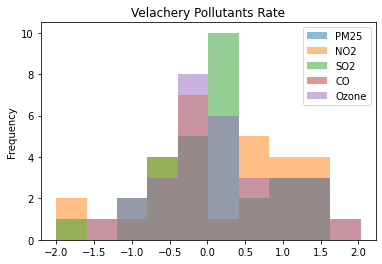

<Figure size 432x288 with 0 Axes>

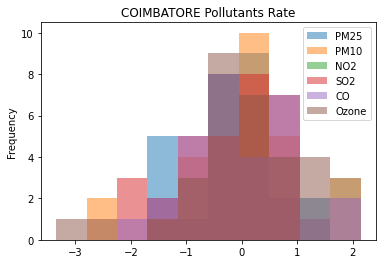

In [334]:
# VELACHERY DATASET REPRESENTATION
df3 = pd.DataFrame({'PM25 ':np.random.randn(30),'NO2':np.random.randn(30),
                   'SO2':np.random.randn(30),'CO ':np.random.randn(30)
                   ,'Ozone':np.random.randn(30)},
    columns =['PM25','NO2','SO2','CO', 'Ozone'])
plt.figure()
df3.plot.hist(alpha = 0.5)
plt.title("Velachery Pollutants Rate")
plt.show()


# COIMBATORE DATASET REPRESENTATION

df4 = pd.DataFrame({'PM25':np.random.randn(30),'PM10':np.random.randn(30),'NO2 ':np.random.randn(30),
                   'SO2':np.random.randn(30),'CO':np.random.randn(30)
                   ,'Ozone':np.random.randn(30)},
    columns =['PM25','PM10','NO2','SO2','CO', 'Ozone'])

plt.figure()
df4.plot.hist(alpha = 0.5)
plt.title("COIMBATORE Pollutants Rate")
plt.show()

# CORRELATION AMONG VARIABLES

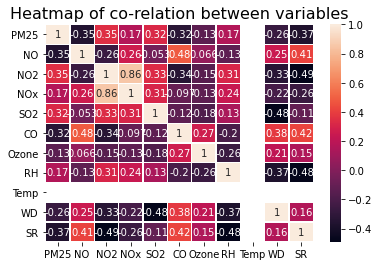

In [335]:
sns.heatmap(df1.corr(),annot=True, linewidths=.2)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

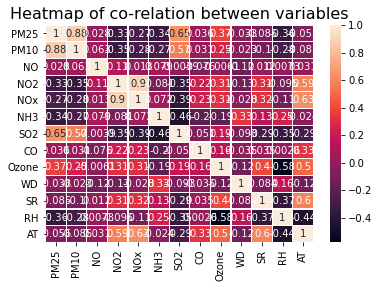

In [336]:
sns.heatmap(df2.corr(),annot=True, linewidths=.2)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Understanding Linearity between Relative Humidity(RH) & other variables

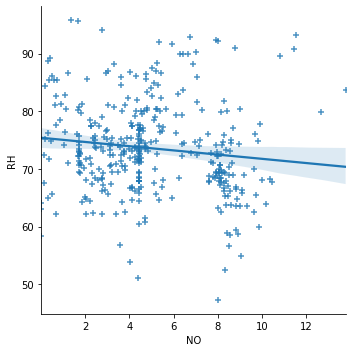

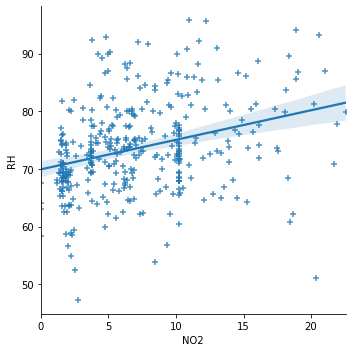

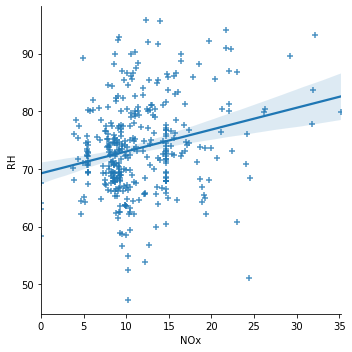

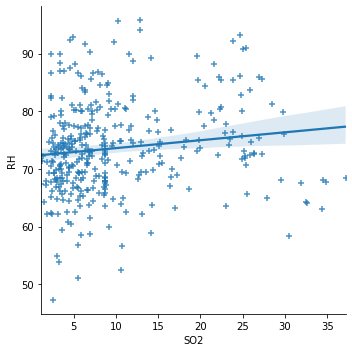

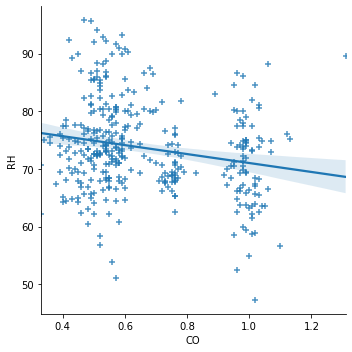

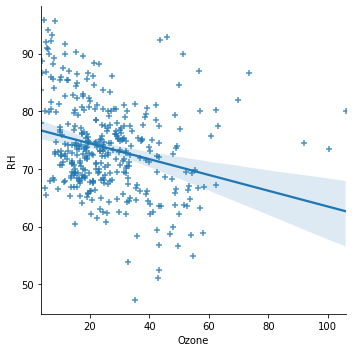

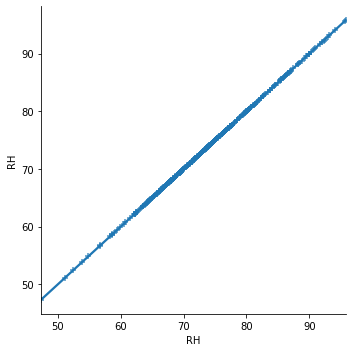

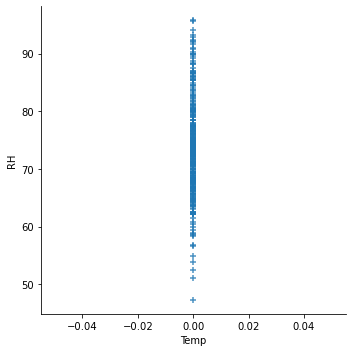

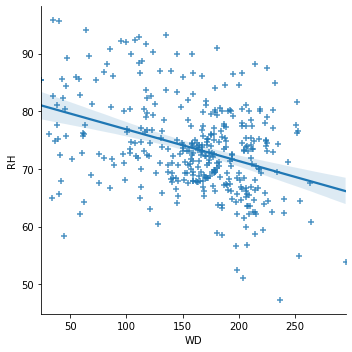

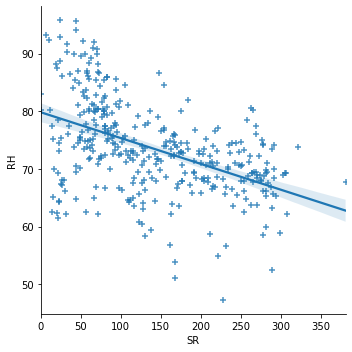

In [337]:
col2=df1.columns.tolist()[2:]
for i in df1.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df1,markers='+')

# Find AQI On Concentration of PM2.5 on 24 hour average


# AQI Category                              Index Values   
            Good                                        0   -  30 
            Satisfactory                                30  -  60
            Moderate                                    60  –  90
            Poor                                        90  –  120
            Very Poor                                   120 –  250
            SEVERE                                      250 –  380                                 

In [339]:
# print("Enter Date in DD-MM-YYYY 00:00 format:")
#d=input("Enter Date:")
#df1=pd.read_csv('velachery.csv')
#df2=pd.read_csv('SIDCO Kurichi, Coimbatore - TNPCB.csv')

# print("Enter Date in DD-MM-YYYY format:")
d=input("Enter Date:")
print("******************************************************************************")
#Select specific row of your dataframe
print(" Values of Velachery Dataset",'\n')
print(df1.loc[df1['Date'] == d],'\n')

print("******************************************************************************")
print(" Values of COIMBATORE Dataset",'\n')
print(df2.loc[df2['DATE'] == d])

print("******************************************************************************")

#df1.loc[(df1['Date'] == d) & df1['PM2.52.5'].isin(df1)]

Enter Date:25-05-2020 00:00
******************************************************************************
 Values of Velachery Dataset 

                Date   PM25    NO   NO2   NOx    SO2    CO  Ozone     RH  \
54  25-05-2020 00:00  16.18  8.58  1.88  8.91  12.06  0.94  43.23  74.49   

    Temp      WD      SR  
54   0.0  163.23  238.58   

******************************************************************************
 Values of COIMBATORE Dataset 

                DATE   PM25   PM10       NO    NO2    NOx   NH3   SO2    CO  \
54  25-05-2020 00:00  24.99  36.95  0.82136  48.19  36.62  0.79  6.87  0.89   

    Ozone     WD      SR     RH     AT  
54  17.48  75.29  263.81  31.15  29.85  
******************************************************************************


In [340]:
row=int(input("Enter the Row_Value from the above output:"))
#Locate PM2.52.5 value
value1 = df1.iloc[row]["PM25"]
value2=df2.iloc[row]["PM25"]
print("Dataset 1 - PM2.5 Value: ",value1)
print("Dataset 2 - PM2.5 Value: ",value2)

Enter the Row_Value from the above output:54
Dataset 1 - PM2.5 Value:  16.18
Dataset 2 - PM2.5 Value:  24.99


In [341]:
value1=value1.astype('int')
value2=value2.astype('int')

        AQI Category                              Index Values
        Good                                        0   -  30 
        Satisfactory                                30  -  60
        Moderate                                    60  –  90
        Poor                                        90  –  120
        Very Poor                                   120 –  250
        SEVERE                                      250 –  380 

In [342]:
# Find the AQI Category of PM2.52.5 of First Dataset
if value1 > 250 and value1 < 380:
    print(value1,"Severe")
elif value1 > 120 and value1 < 250:
    print(value1,"Very Poor")
elif value1 > 90 and value1 < 120:
    print(value1,"Poor")
elif value1 > 60 and value1 < 90:
    print(value1,"Moderate")
elif value1 > 30 and value1 < 60:
    print(value1,"Satisfactory")
elif value1 > 0 and value1 < 30:
    print(value1,"Good")
else:
        print("error")

16 Good


In [343]:
# Find the AQI Category of PM2.5 of Second Dataset
if value2 > 250 and value2 < 380:
    print(value2,"Severe")
elif value2 > 120 and value2 < 250:
    print(value2,"Very Poor")
elif value2 > 90 and value2 < 120:
    print(value2,"Poor")
elif value2 > 60 and value2 < 90:
    print(value2,"Moderate")
elif value2 > 30 and value2 < 60:
    print(value2,"Satisfactory")
elif value2 > 0 and value2 < 30:
    print(value2,"Good")
else:
        print("error")

24 Good


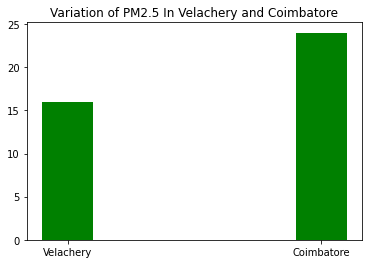

In [344]:
fig = plt.figure()
x1=['Velachery','Coimbatore']
y1=[value1,value2]
plt.title("Variation of PM2.5 In Velachery and Coimbatore")
plt.bar(x1,y1,width=0.2,color="green")
plt.show()

# Variation from Dataset

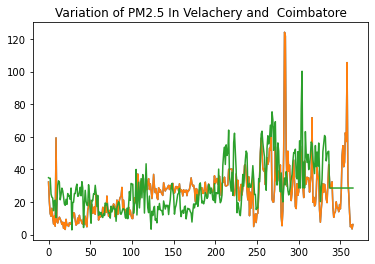

In [345]:
df1['PM25'].plot.line()
y1 = df1['PM25'] # DATASET 1
y2 = df2['PM25'] # DATASET 2
plt.title("Variation of PM2.5 In Velachery and  Coimbatore")
plt.plot(y1)
plt.plot(y2)

plt.show()

# Determining AIQ Value

        AQI Category                               Index Values 
        Good                                        0   -  50 
        Satisfactory                                51  -  100
        Moderate                                    101 –  200
        Poor                                        201 –  300
        Very Poor                                   301 –  400
        SEVERE                                      401 –  500       

In [346]:
X=df2["CO"].mean()
B=df2["NO2"].mean()
C=df2["SO2"].mean()
D=df2["PM25"].mean()
E=df2["Ozone"].mean()


In [347]:
Z1=(X+B+C+D+E)/5
print("Avg of Pollutants:- ",Z1)

Avg of Pollutants:-  15.923462037917455


In [348]:
if Z1 > 401 and Z1 < 500:
    print(Z1,"Severe")
elif Z1 > 301 and Z1 < 400:
    print(Z1,"Very Poor")
elif Z1 > 201 and Z1 < 300:
    print(Z1,"Poor")
elif Z1 > 101 and Z1 < 200:
    print(Z1,"Moderate")
elif Z1 > 51 and Z1 < 100:
    print(Z1,"Satisfactory")
elif Z1 > 0 and Z1 < 50:
    print(Z1,"Good")
else:
    print("error")

15.923462037917455 Good


In [349]:
X=df2["CO"].mean()
B=df2["NO2"].mean()
C=df2["SO2"].mean()
D=df2["PM25"].mean()
E=df2["Ozone"].mean()
F=df2["PM10"].mean()


In [350]:
Z2=(X+B+C+D+E+F)/6
print("Avg of Pollutants:- ",Z2)

Avg of Pollutants:-  19.32945159816445


In [351]:
if Z2 > 401 and Z2 < 500:
    print(Z2,"Severe")
elif Z2 > 301 and Z2 < 400:
    print(Z2,"Very Poor")
elif Z2 > 201 and Z2 < 300:
    print(Z2,"Poor")
elif Z2 > 101 and Z2 < 200:
    print(Z2,"Moderate")
elif Z2 > 51 and Z2 < 100:
    print(Z2,"Satisfactory")
elif Z2 > 0 and Z2 < 50:
    print(Z2,"Good")
else:
    print("error")

19.32945159816445 Good


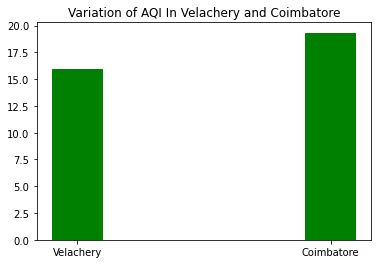

In [352]:
fig = plt.figure()
x1=['Velachery','Coimbatore']
y1=[Z1,Z2]
plt.title("Variation of AQI In Velachery and Coimbatore")
plt.bar(x1,y1,width=0.2,color="green")
plt.show()

# REGRESSION ANALYSIS ON Solar Radiation (SR)

In [353]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [354]:
#Let X-input and Y-input features
X=df1[col2].drop('SR',1)     
Y=df1['SR']   
SScaler=StandardScaler()
Xsd=SScaler.fit_transform(X)    #applying standardisation
X.head()

,NO,NO2,NOx,SO2,CO,Ozone,RH,Temp,WD
0,8.27,1.17,8.19,8.73,0.73,16.57,67.52,0.0,154.94
1,7.60,1.64,8.22,8.04,0.74,18.42,68.80,0.0,174.52
2,7.58,1.83,8.43,7.37,0.73,16.27,67.83,0.0,159.07
3,8.32,1.64,8.65,5.79,0.76,13.19,65.33,0.0,145.94
4,7.69,1.47,8.18,2.54,0.76,10.89,71.29,0.0,152.40


In [355]:
Y.head()

0    283.76
1    259.23
2    250.10
3    282.04
4    260.81
Name: SR, dtype: float64

In [356]:
X_train, X_test, y_train, y_test=train_test_split(Xsd,Y,test_size=0.4, random_state=3)

In [357]:
model= LinearRegression()

In [358]:
model.fit(X_train,y_train)

LinearRegression()

In [359]:
print('Intercept:',model.intercept_)

Intercept: 141.11695868011608


In [360]:
prediction = model.predict(X_test)
prediction

array([141.68100126, 124.58344751,  69.60078825, 196.03281962,
       114.05444743,  96.42202102,  96.28560921, 184.11236756,
        67.70469939,  94.94339174,  87.04930209, 210.22501622,
       146.12014829, 206.4418285 , 116.81841284, 142.47292471,
       250.81619849, 221.80598176, 124.08302114, 106.67413503,
       234.15771719,  79.99533833, 105.05138891, 146.33771662,
       114.40359356, 134.0380101 , 111.76267586, 131.21904242,
       221.26963501, 210.88387826, 266.28320283, 160.58743411,
        99.08412381, 108.78279517, 138.77317401,  52.50649572,
       241.8946338 ,  68.43991668, 170.28873334, 161.07098663,
       204.16040555,  91.00363147, 165.06177335, 146.7695363 ,
        95.44778816,  72.40809143, 130.18954878, 267.72172137,
       226.64325817, 173.44458551, 108.24822757,  20.68682746,
       240.97281545, 134.44369278, 144.72995079, 133.92317284,
       154.01887426, 106.15250728, 184.72691582, 101.66303418,
       118.59312854, 113.20480219, 217.15552374, 105.92

In [361]:
y_test

102    291.79
330    170.79
240     66.42
24     236.64
134     20.41
        ...  
157    243.63
193    106.17
168    102.76
3      282.04
154    119.77
Name: SR, Length: 147, dtype: float64

In [362]:
print("Co-efficient:")
list(zip(X.columns,model.coef_))

Co-efficient:


[('NO', -9.614179659349526),
 ('NO2', -78.13703766249932),
 ('NOx', 55.2471364291561),
 ('SO2', -2.549836869903803),
 ('CO', 23.984200914962628),
 ('Ozone', -0.24663718816504776),
 ('RH', -37.99384903097754),
 ('Temp', 0.0),
 ('WD', -22.32206761880083)]

In [363]:
#Root Mean Square Error
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rs)
print("\n")
print("Therefore by applying Linear Regression we can predict RH using all the features together with RSME=",rs)

62.595455290714035


Therefore by applying Linear Regression we can predict RH using all the features together with RSME= 62.595455290714035


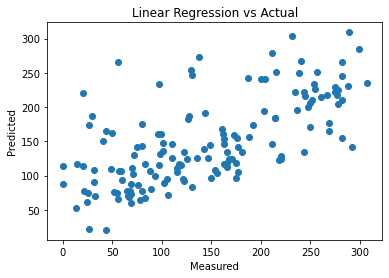

In [364]:
plt.scatter(y_test,prediction)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression vs Actual')
plt.show()

# DECISON TREE REGRESSION

In [365]:
from sklearn.tree import DecisionTreeRegressor  
model2=DecisionTreeRegressor()

In [366]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [367]:
prediction2=model2.predict(X_test) 
prediction2

array([112.44, 204.23,  84.38, 247.49,  43.52,  48.78,  33.74, 214.73,
        39.89,  43.52,  73.75, 279.31, 129.35, 261.3 , 143.44,  83.86,
       282.29, 269.93, 191.49, 192.86, 269.93,  83.74,  92.87, 114.61,
        71.01, 111.53,  71.  , 146.82, 219.82, 221.61, 164.  ,  76.97,
        39.89,  22.81,  53.77,  58.74, 278.06,  52.05, 109.44, 227.27,
       269.87,  71.  , 153.52, 176.81, 148.35,  58.74,  65.77, 302.77,
       238.58, 129.35, 198.01,  23.75,  75.23,  78.75, 109.44, 198.01,
        22.18,  61.94, 261.3 ,  79.02, 115.08, 153.52, 269.93, 204.23,
       125.97, 381.26,  75.23, 128.01, 145.41, 289.49,  76.97, 269.51,
        78.75, 127.28, 109.44,  73.75, 108.87, 156.72, 274.73, 278.06,
       168.12,  70.58, 109.44, 166.87, 291.39, 321.92, 168.12, 238.58,
       291.39, 278.06, 234.81,  39.89,  61.94, 164.  , 253.78,  86.56,
        53.39,  15.87,  10.04, 153.52, 269.93, 197.25, 302.77,  55.85,
        53.39, 153.75, 278.06,  52.05, 109.44, 111.53, 302.77,  61.19,
      

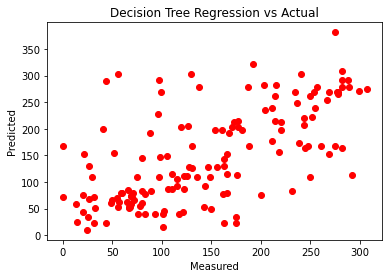

In [368]:
plt.scatter(y_test,prediction2,color='red')
plt.xlabel('Measured')
plt.ylabel('Predicted')                                                                                                                                                                                                                                                                                                                                
plt.title('Decision Tree Regression vs Actual')
plt.show()

In [369]:
#Root Mean Square Error
from sklearn import metrics
rs2=np.sqrt(metrics.mean_squared_error(y_test,prediction2))
print(rs2)
print("\n")
print("Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME=",rs2)

73.05725183894138


Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME= 73.05725183894138


# Random Forest Regression

In [372]:
from sklearn.ensemble import RandomForestRegressor          
model3=RandomForestRegressor()

In [373]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [374]:
prediction3=model3.predict(X_test) 
prediction3

array([111.5721, 120.4393,  76.9179, 241.1364,  54.1751, 123.2187,
        67.818 , 195.8281,  70.2678,  98.3533,  83.262 , 267.1502,
       147.528 , 252.0004, 136.6348, 120.0067, 265.2538, 259.8379,
       155.0012,  91.6238, 264.2712,  75.0891, 104.0331, 122.0027,
        76.7306, 110.6974,  55.0566,  73.499 , 239.7084, 275.9552,
       163.9073,  97.5524,  79.8338,  36.4992, 132.0238,  62.627 ,
       262.7279,  44.8352, 198.3154, 146.6628, 229.0047,  47.3818,
       119.3489, 172.4668,  74.4004,  70.1423,  90.3812, 241.0538,
       248.321 , 203.0996, 121.231 ,  39.9805, 196.8708, 128.5701,
       171.2386, 168.2985, 165.5138,  86.9987, 242.3923,  79.8162,
       157.4062, 133.3054, 254.0193, 166.1771, 139.2283, 270.4943,
       161.4613, 152.9412, 162.7205, 141.5927,  80.5649, 249.0071,
        84.1831, 139.2143, 189.6844,  72.4845, 104.1519, 129.1752,
       270.4806, 258.1133, 210.009 ,  56.4639, 149.5074,  83.6946,
       230.5655, 242.4271, 208.3288, 242.2581, 264.5908, 246.0

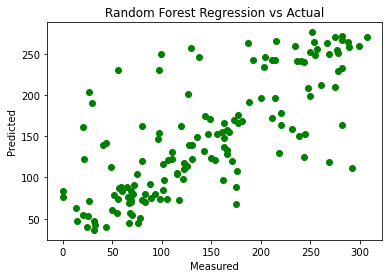

In [375]:
plt.scatter(y_test,prediction3,color='green')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression vs Actual')
plt.show()

In [376]:
#Root Mean Square Error
from sklearn import metrics
rs3=np.sqrt(metrics.mean_squared_error(y_test,prediction3))
print(rs3)
print("\n")
print("Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME=",rs3)

56.056139062573564


Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME= 56.056139062573564


# Support Vector Machine

In [377]:
from sklearn.svm import SVR          
model4=SVR()

In [378]:
model4.fit(X_train,y_train)

SVR()

In [379]:
prediction4=model4.predict(X_test) 
prediction4

array([117.66431756, 111.34031298, 111.3466943 , 130.41907165,
       113.91894599, 111.29644856, 111.83838966, 123.68157561,
       102.46210425, 112.31674738,  99.38184972, 132.38792308,
       117.93816424, 128.3536258 , 115.8111884 , 112.5399496 ,
       126.76353605, 133.58869151, 115.1835852 , 104.35325266,
       135.21586008, 101.78863906, 113.1244411 , 108.32147466,
       108.07226018, 106.78390694, 105.99181277, 109.32897628,
       130.89021121, 132.93487323, 125.5234053 , 119.58020934,
       103.20617777, 113.20986173, 116.70161972, 108.20302731,
       124.77419542, 100.1769762 , 122.53456618, 119.35996503,
       128.76228205, 105.35058201, 119.79703483, 116.94128089,
       110.19869923, 101.13974441, 107.71132147, 128.86827613,
       130.02511492, 122.18261878, 109.42091211,  99.25141168,
       125.9849652 , 106.93083977, 116.49684274, 114.10274271,
       116.4760287 , 104.26248149, 123.18406501, 109.45262514,
       114.18492894, 112.37701557, 125.73049218, 110.63

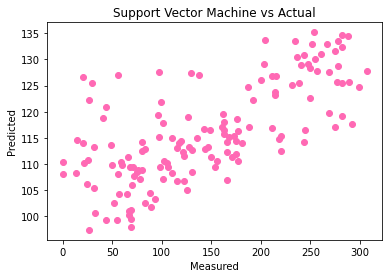

In [384]:
plt.scatter(y_test,prediction4,color='hotpink')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Support Vector Machine vs Actual')
plt.show()

In [385]:
#Root Mean Square Error
from sklearn import metrics
rs4=np.sqrt(metrics.mean_squared_error(y_test,prediction4))
print(rs4)
print("\n")
print("Therefore by applying Support Vector Machine we can predict RH using all the features together with RSME=",rs4)

82.28652690549119


Therefore by applying Support Vector Machine we can predict RH using all the features together with RSME= 82.28652690549119


# Conclusion

In [386]:
print("We got following RMSE by applying different regression:\n\n")
print("Linear Regression=",rs,"\n")
print("Decision Tree Regression=",rs2,"\n")
print("Random Forest Regression=",rs3,"\n")
print("Support Vector Machine Regression=",rs4,"\n")

We got following RMSE by applying different regression:


Linear Regression= 62.595455290714035 

Decision Tree Regression= 73.05725183894138 

Random Forest Regression= 56.056139062573564 

Support Vector Machine Regression= 82.28652690549119 



In [387]:
print("So we acheive best results from:")
dict={"Linear Regression": rs,"Decision Tree Regression": rs2,"Random Forest Regression": rs3, "Support Vector Machine Regression":rs4   }
res =  [key for key in dict if 
        all(dict[temp] >= dict[key] 
        for temp in dict)] 
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)


So we acheive best results from:
{'Random Forest Regression': 56.056139062573564}


# SOLAR RADIATION VALUE - PREDICTED WITH BEST RESULT

# From the given datasets, the values are determined and compared to find Air Quality Index and found that both Chennai and Coimbatore are at GOOD level.